# Report on the MNIST dataset

## Objectives and Dataset Summary

I have chosen to build a model that will perform deep learning on the classic dataset: the MNIST dataset. This set is made up of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9. The purpose of our deep learning model will be to classify the MNIST handwritten digits. This report will explore how to maximise the test accuracy for this type of model.

## Data exploration/cleaning

Once we've loaded in the MNIST dataset, we must reshape the data for a greyscale format.

In [8]:
import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [3]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

### The images need to be reshaped or errors will be thrown up ###

train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

## Model Training

To maximise our accuracy we are going to investigate 3 neural network models:

1. A Neural Network using a single convolutional layer (with no dropout layers)

2. A Neural Network using a single convolutional layer (with a dropout layer)

3. A Neural Network using multiple (3) convolutional layers (including dropout layers)

## Neural network using a single convolutional layer

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 148,810
Trainable params: 148,810
Non-trainable params: 0
__________________________________________________

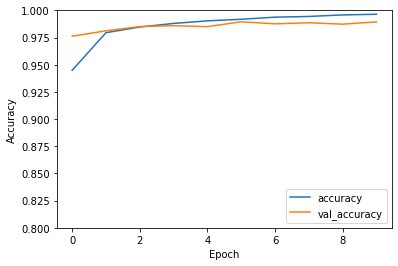

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28,1))) #only one layer
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

So our model got a higher accuracy on the training dataset than on the test dataset which could indicate overfitting.  
Maximum test accuracy was around 98-99%

## Neural network with a single convolutional layer (with an added dropout layer)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

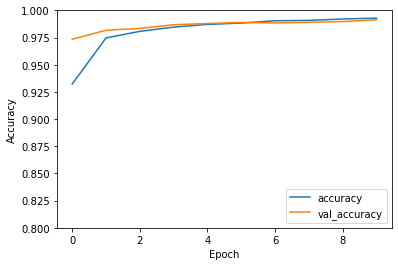

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28,1))) #only one layer
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout((0.25)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Our test accuracy is now similar to our train accuracy at around 99+% so the added dropout layer has proved useful.

## Neural network with multiple (3) convolutional layers

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

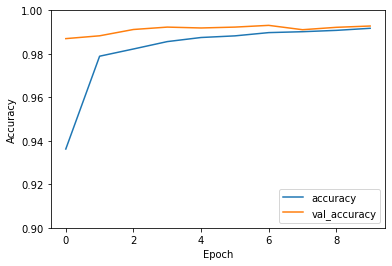

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28,1))) #1
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout((0.25)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu')) #2
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout((0.25)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu')) #3
model.add(keras.layers.Dropout((0.25)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Maximum test accuracy is slightly higher than the previous model so it seems that a neural network with multiple convolutional layers performs better. The only drawback to such a model is the higher processing needs, this neural network took double the time to run compared to the single layer networks.

## Summary of Key Findings and Insights

The first model had a large divergence in training and testing accuracies due to what seems like overfitting although it was quite efficient and quick to train while still achieving a 98% test accuracy.

The second model fixed the overfitting issue thanks to an added dropout layer which acts as regularization. The test accuracy is improved to 99%.

The third and final model adds 2 more convolutional layers, although taking quite long to train, it achieves a high test accuracy of 99.3%

## Next Steps

We have clearly achieved very high test accuracies but it might be worth investigating neural networks with even more convolutional layers. Theoretically this should improve the accuracy.